In [8]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

Read Video from Source

In [9]:
source = 'race_car.mp4'   # source = 0 for webcam
cap = cv2.VideoCapture(source)

In [10]:
if not cap.isOpened() :
    print("Error opening video stream or file")

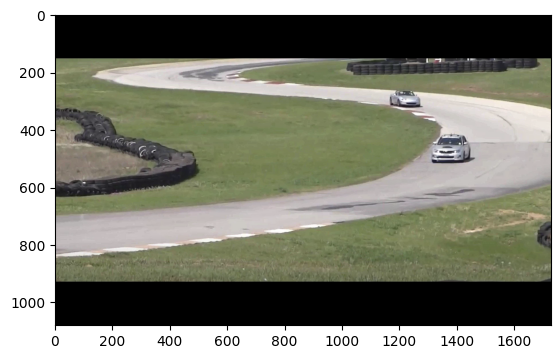

In [11]:
#Read and display one frame
ret, frame = cap.read()
plt.imshow(frame[:,:,::-1])

In [5]:
from IPython.display import HTML
HTML(f"""<video width=700 controls><source src="race_car.mp4" type="video/mp4"></video>""")

In [12]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

In [13]:
while cap.isOpened() :
    ret, frame = cap.read()

    if ret :
        out_avi.write(frame)
        out_mp4.write(frame)
    else :
        break

In [14]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

In [ ]:
import subprocess  # Permet d'exécuter des commandes système depuis Python

# Exécuter la commande FFmpeg pour convertir la vidéo
subprocess.run([
    "ffmpeg",                       # Programme à exécuter
    "-y",                           # Écrase le fichier de sortie s'il existe déjà
    "-i", "race_car_out.mp4",       # Fichier vidéo d'entrée
    "-c:v", "libx264",              # Codec vidéo H264 pour la sortie
    "race_car_out_x264.mp4"         # Nom du fichier vidéo de sortie
])


CompletedProcess(args=['ffmpeg', '-y', '-i', 'race_car_out.mp4', '-c:v', 'libx264', 'race_car_out_x264.mp4'], returncode=0)

In [17]:
mp4 = open("race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")